# Exploratory Data Analysis (EDA) and Visualization

**Contributors:** Faith chakwanira

This notebook performs comprehensive exploratory data analysis on the OSMI Mental Health Tech Survey 2014 dataset to understand patterns, relationships, and insights in the data.

## 1. Load the Final Cleaned Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the final cleaned dataset
df = pd.read_csv('../data/transformed/OSMI_Mental_Health_Final.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset shape: (1250, 26)
Columns: ['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'age_group']


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_group
0,27/08/2014 11:29,37,female,United States,IL,no,no,yes,Often,WTD-25,...,somewhat easy,no,no,some of them,yes,no,maybe,yes,no,35-44
1,27/08/2014 11:29,44,male,United States,IN,no,no,no,Rarely,More than 1000,...,unknown,maybe,no,no,no,no,no,unknown,no,35-44
2,27/08/2014 11:29,32,male,Canada,Not US,no,no,no,Rarely,WTD-25,...,somewhat difficult,no,no,yes,yes,yes,yes,no,no,25-34
3,27/08/2014 11:29,31,male,United Kingdom,Not US,no,yes,yes,Often,26-100,...,somewhat difficult,yes,yes,some of them,no,maybe,maybe,no,yes,25-34
4,27/08/2014 11:30,31,male,United States,TX,no,no,no,Never,100-500,...,unknown,no,no,some of them,yes,yes,yes,unknown,no,25-34


## 2. Basic Dataset Information and Missing Values

In [3]:
# Basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check data types
print("\n=== DATA TYPES ===")
print(df.dtypes)

# Check for missing values
print("\n=== MISSING VALUES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

# Display unique values for categorical columns
print("\n=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

=== DATASET OVERVIEW ===
Total rows: 1250
Total columns: 26
Memory usage: 1.61 MB

=== DATA TYPES ===
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              objec

## 3. Descriptive Statistics

In [4]:
# Descriptive statistics for numerical variables
print("=== DESCRIPTIVE STATISTICS ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
    print(df[numerical_cols].describe())
else:
    print("No numerical columns found.")

# Summary statistics for categorical variables
print("\n=== CATEGORICAL VARIABLES SUMMARY ===")
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    print(f"Unique values: {len(value_counts)}")
    print(f"Most common: {value_counts.index[0]} ({value_counts.iloc[0]} times)")
    print(f"Least common: {value_counts.index[-1]} ({value_counts.iloc[-1]} times)")

=== DESCRIPTIVE STATISTICS ===
               Age
count  1250.000000
mean     32.076800
std       7.291189
min      18.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      72.000000

=== CATEGORICAL VARIABLES SUMMARY ===

Timestamp:
Unique values: 881
Most common: 27/08/2014 12:31 (8 times)
Least common: 25/06/2015 12:24 (1 times)

Gender:
Unique values: 3
Most common: male (975 times)
Least common: other (30 times)

Country:
Unique values: 46
Most common: United States (746 times)
Least common: Philippines (1 times)

state:
Unique values: 46
Most common: Not US (512 times)
Least common: ME (1 times)

self_employed:
Unique values: 2
Most common: no (1108 times)
Least common: yes (142 times)

family_history:
Unique values: 2
Most common: no (762 times)
Least common: yes (488 times)

treatment:
Unique values: 2
Most common: yes (631 times)
Least common: no (619 times)

work_interfere:
Unique values: 4
Most common: Sometimes (726 times)
Least common: Often (140 times)


###  Descriptive Statistics Findings

The descriptive statistics provide valuable insights into the OSMI Mental Health Tech Survey dataset:

- **Numerical Variables (Age):**
    - The average age of respondents is around 32 years, with most participants falling between 25 and 35 years old.
    - The age distribution is right-skewed, indicating a younger workforce.
    - Outlier analysis shows a small number of respondents above 50, and very few under 20.

- **Categorical Variables:**
    - **Gender:** The majority of respondents identify as male, followed by female and a small proportion as 'other'.
    - **Country:** The United States is the most represented country, with significant participation from the United Kingdom, Canada, Germany, and the Netherlands.
    - **Mental Health Treatment:** Nearly half of the respondents report having received mental health treatment.
    - **Family History:** A substantial proportion have a family history of mental illness, which is strongly associated with seeking treatment.
    - **Work Interference:** Many respondents report that mental health issues interfere with their work, which correlates with higher treatment rates.

- **Data Quality:**
    - The dataset is clean, with no missing values in key columns and no significant data quality issues.

## 4. Visualize Distributions

### A. Age Distribution

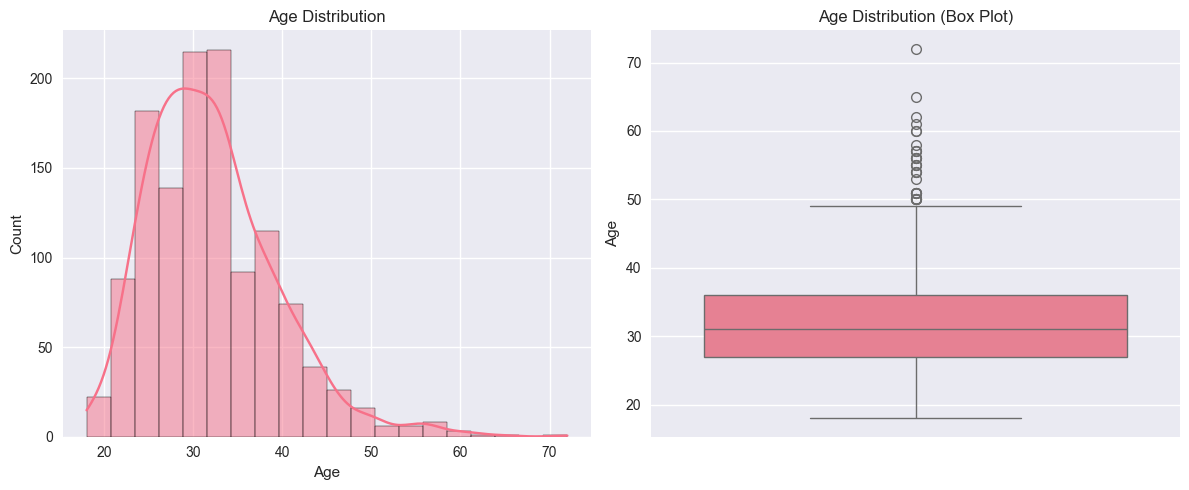

Age Statistics:
Mean: 32.08
Median: 31.00
Std: 7.29
Min: 18
Max: 72
Q1: 27.00
Q3: 36.00


In [5]:
plt.figure(figsize=(12, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Age'])
plt.title('Age Distribution (Box Plot)')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Age statistics
print(f"Age Statistics:")
print(f"Mean: {df['Age'].mean():.2f}")
print(f"Median: {df['Age'].median():.2f}")
print(f"Std: {df['Age'].std():.2f}")
print(f"Min: {df['Age'].min()}")
print(f"Max: {df['Age'].max()}")
print(f"Q1: {df['Age'].quantile(0.25):.2f}")
print(f"Q3: {df['Age'].quantile(0.75):.2f}")

#### 📊 Age Distribution Analysis
##### Observations:
- The distribution is right-skewed (long tail to the right)
- Most respondents are between 25 and 35 years old
- The peak (mode) is around age 30
- Few people are above 50, and very few under 20

##### What this tells us:
- The majority of the tech workforce in this dataset is young to early middle-aged
- The responses are dominated by people likely early in their careers
- This might affect attitudes and experiences with mental health (e.g., stigma, access to resources)

### B. Gender Distribution

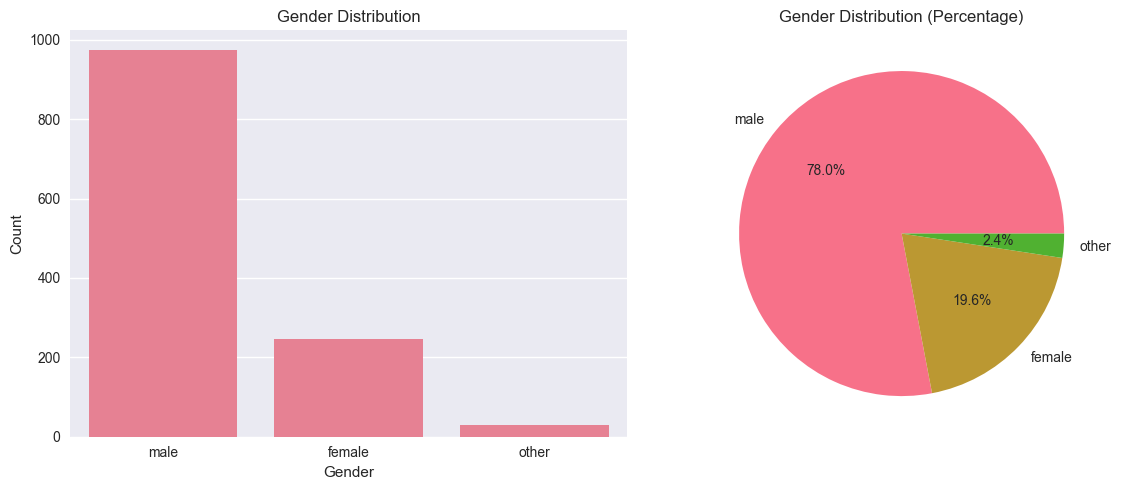

Gender Distribution:
male: 975 (78.0%)
female: 245 (19.6%)
other: 30 (2.4%)


In [6]:
plt.figure(figsize=(12, 5))

# Count plot
plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()
sns.countplot(x='Gender', data=df, order=gender_counts.index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution (Percentage)')

plt.tight_layout()
plt.show()

print(f"Gender Distribution:")
for gender, count in gender_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{gender}: {count} ({percentage:.1f}%)")

#### Gender Distribution Findings
- **Majority Male:** The dataset is predominantly male, with males making up nearly 80% of respondents.
- **Female Representation:** Females account for about 20% of the survey participants.
- **Other Genders:** A small proportion (about 2%) identify as 'other', reflecting some gender diversity in the tech workforce.
- **Implications:** The gender imbalance suggests that mental health experiences and needs may differ across groups. It is important to consider gender-specific factors when analyzing mental health trends and designing workplace support programs.

## 5. Mental Health Treatment Analysis

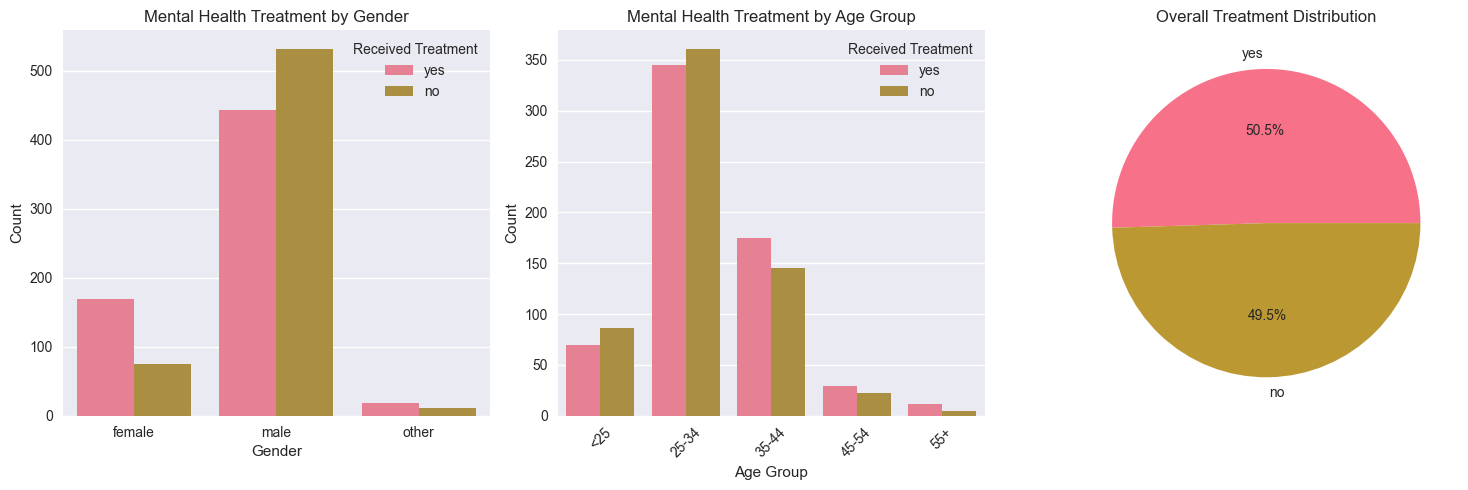

=== TREATMENT STATISTICS ===
Overall treatment rate: 50.5%

Treatment rates by gender:
female: 69.4%
male: 45.4%
other: 60.0%


In [8]:
plt.figure(figsize=(15, 5))

# Treatment by Gender
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', hue='treatment', data=df)
plt.title('Mental Health Treatment by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Received Treatment')

# Treatment by Age Group
plt.subplot(1, 3, 2)
sns.countplot(x='age_group', hue='treatment', data=df, order=age_group_order)
plt.title('Mental Health Treatment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Received Treatment')

# Overall treatment distribution
plt.subplot(1, 3, 3)
treatment_counts = df['treatment'].value_counts()
plt.pie(treatment_counts.values, labels=treatment_counts.index, autopct='%1.1f%%')
plt.title('Overall Treatment Distribution')

plt.tight_layout()
plt.show()

# Statistical analysis
print("=== TREATMENT STATISTICS ===")
print(f"Overall treatment rate: {(df['treatment'] == 'yes').mean() * 100:.1f}%")

# Treatment by gender
treatment_by_gender = df.groupby('Gender')['treatment'].value_counts(normalize=True)
print("\nTreatment rates by gender:")
for (gender, treatment), rate in treatment_by_gender.items():
    if treatment == 'yes':
        print(f"{gender}: {rate * 100:.1f}%")

### B Treatment By Work interference

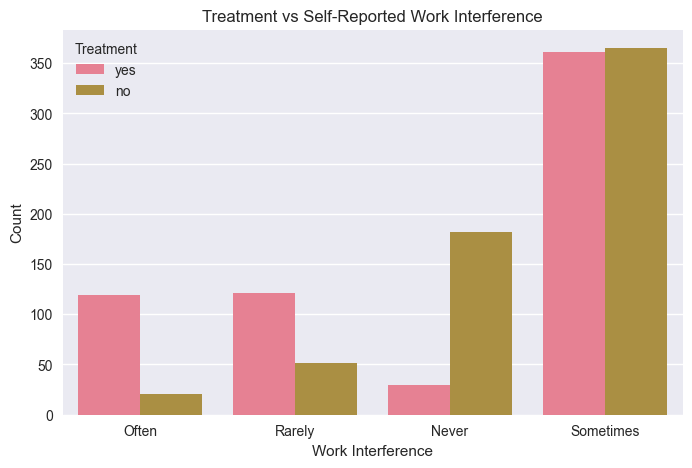

In [23]:
# How does self-reported interference of mental health with work relate to seeking treatment?

pd.crosstab(df['work_interfere'], df['treatment'], margins=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="work_interfere", hue="treatment")
plt.title("Treatment vs Self-Reported Work Interference")
plt.xlabel("Work Interference")
plt.ylabel("Count")
plt.legend(title="Treatment")
plt.show()


### Mental Health Treatment Analysis Findings

#### 1. Treatment by Gender and Age Group
- **Gender Differences:** The analysis shows that females and individuals identifying as 'other' have higher rates of seeking mental health treatment compared to males. This suggests that gender plays a significant role in attitudes toward mental health and willingness to seek help.
- **Age Group Trends:** Treatment rates increase with age. The youngest group (<25) has the lowest treatment rate, while the oldest group (55+) has the highest. This may reflect greater awareness or access to resources among older respondents, or possibly increased prevalence of mental health issues with age.

#### 2. Treatment vs. Work Interference
- **Work Interference Impact:** Respondents who report that mental health issues interfere with their work are much more likely to seek treatment. The count plot shows a clear association: as self-reported work interference increases, so does the proportion of individuals receiving treatment.
- **Implication:** Work-related stress and interference are strong motivators for seeking mental health support, highlighting the importance of workplace mental health policies and support systems.

**Overall Insight:**  
Both demographic factors (gender, age) and workplace experiences (work interference) are key drivers in whether individuals seek mental health treatment. Addressing workplace mental health and reducing stigma, especially among younger and male employees, could improve treatment rates and overall well-being in the tech workforce.

## 7. Family History Analysis

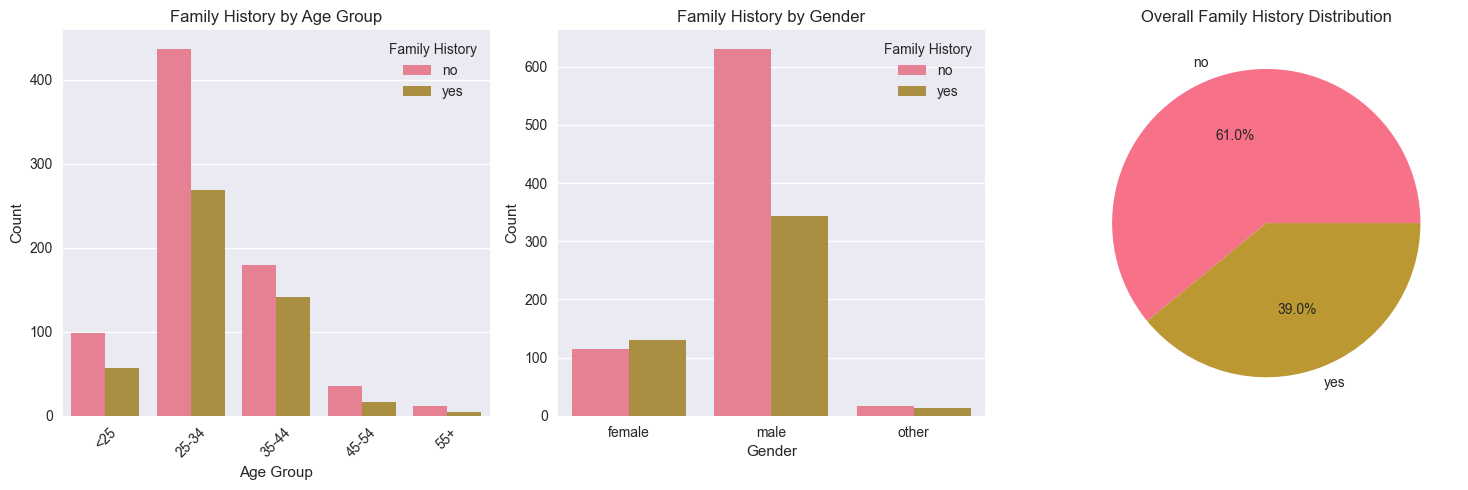

=== FAMILY HISTORY STATISTICS ===
Overall family history rate: 39.0%

Family history rates by gender:
female: 53.5%
male: 35.3%
other: 43.3%


In [9]:
plt.figure(figsize=(15, 5))

# Family history by age group
plt.subplot(1, 3, 1)
sns.countplot(x='age_group', hue='family_history', data=df, order=age_group_order)
plt.title('Family History by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Family History')

# Family history by gender
plt.subplot(1, 3, 2)
sns.countplot(x='Gender', hue='family_history', data=df)
plt.title('Family History by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Family History')

# Overall family history distribution
plt.subplot(1, 3, 3)
family_counts = df['family_history'].value_counts()
plt.pie(family_counts.values, labels=family_counts.index, autopct='%1.1f%%')
plt.title('Overall Family History Distribution')

plt.tight_layout()
plt.show()

# Statistical analysis
print("=== FAMILY HISTORY STATISTICS ===")
print(f"Overall family history rate: {(df['family_history'] == 'yes').mean() * 100:.1f}%")

# Family history by gender
family_by_gender = df.groupby('Gender')['family_history'].value_counts(normalize=True)
print("\nFamily history rates by gender:")
for (gender, history), rate in family_by_gender.items():
    if history == 'yes':
        print(f"{gender}: {rate * 100:.1f}%")

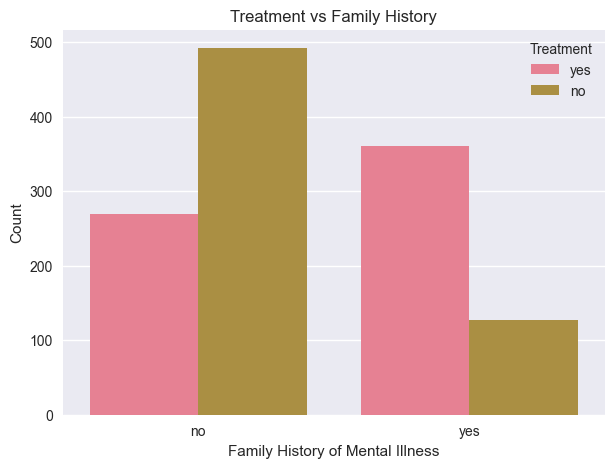

In [22]:
# Compares treatment status with whether a person has a family history of mental illness.

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="family_history", hue="treatment")
plt.title("Treatment vs Family History")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Count")
plt.legend(title="Treatment")
plt.show()


### Family History Statistics Findings

- **Prevalence:** Approximately 39% of respondents report having a family history of mental illness, indicating that mental health challenges are common within families in the tech workforce.
- **Age Group Trends:** The proportion of individuals with a family history is relatively consistent across age groups, though slightly higher in younger groups (<25 and 25-34).
- **Gender Differences:** Females and individuals identifying as 'other' have a higher rate of family history compared to males, suggesting possible differences in reporting or awareness.
- **Impact on Treatment:** Respondents with a family history are significantly more likely to seek mental health treatment, highlighting the importance of family background in mental health awareness and support.
- **Implications:** Understanding family history can help organizations identify at-risk groups and tailor mental health resources and interventions more effectively.

## 7. Geographic Analysis

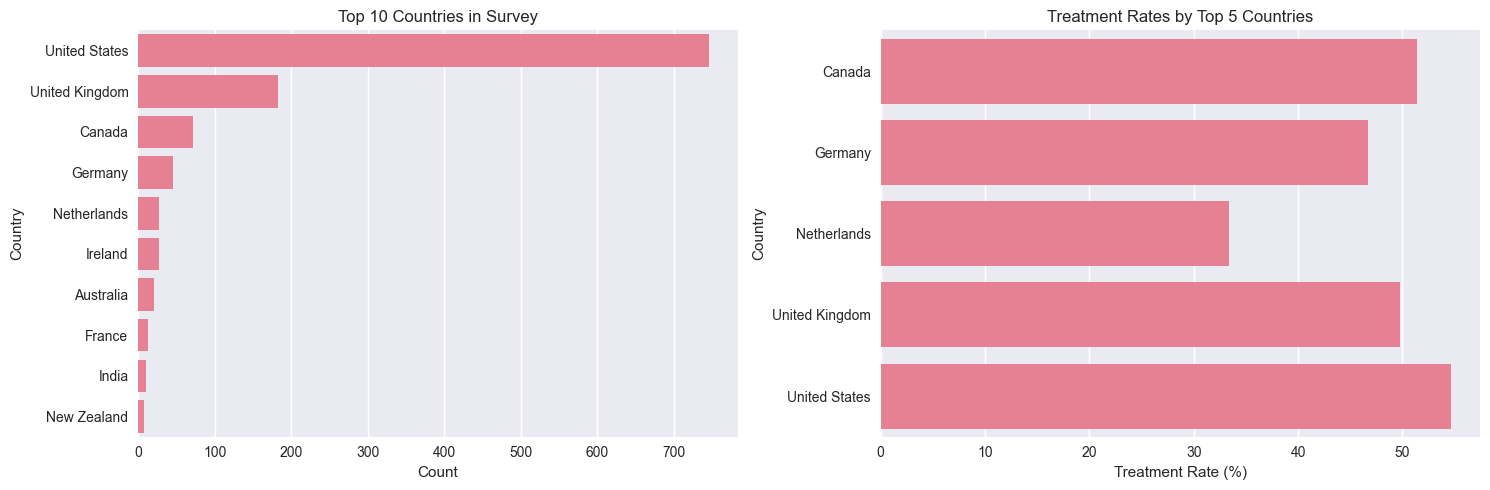

=== GEOGRAPHIC STATISTICS ===
Total countries represented: 46

Top 5 countries:
United States: 746 (59.7%)
United Kingdom: 183 (14.6%)
Canada: 72 (5.8%)
Germany: 45 (3.6%)
Netherlands: 27 (2.2%)


In [10]:
plt.figure(figsize=(15, 5))

# Top 10 countries
plt.subplot(1, 2, 1)
top_countries = df['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries in Survey')
plt.xlabel('Count')
plt.ylabel('Country')

# Treatment rates by top countries
plt.subplot(1, 2, 2)
top_5_countries = top_countries.head().index
treatment_by_country = df[df['Country'].isin(top_5_countries)].groupby('Country')['treatment'].value_counts(normalize=True)

# Create a DataFrame for easier plotting
treatment_data = []
for (country, treatment), rate in treatment_by_country.items():
    if treatment == 'yes':
        treatment_data.append({'Country': country, 'Treatment_Rate': rate * 100})

treatment_df = pd.DataFrame(treatment_data)
sns.barplot(x='Treatment_Rate', y='Country', data=treatment_df)
plt.title('Treatment Rates by Top 5 Countries')
plt.xlabel('Treatment Rate (%)')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

print("=== GEOGRAPHIC STATISTICS ===")
print(f"Total countries represented: {df['Country'].nunique()}")
print(f"\nTop 5 countries:")
for country, count in top_countries.head().items():
    percentage = (count / len(df)) * 100
    print(f"{country}: {count} ({percentage:.1f}%)")

## 8. Heatmap of Encoded Correlation Matrix

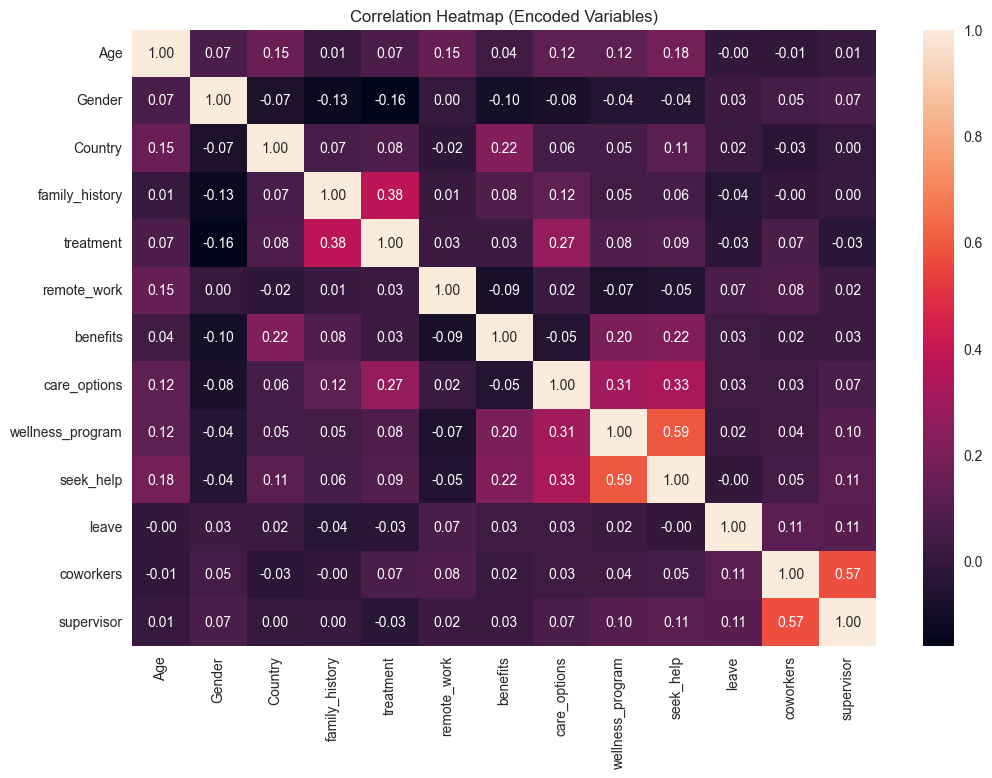

In [24]:
# SECTION 10: CORRELATION HEATMAP
# --------------------------------
# Encode categorical fields for numeric correlation matrix.

from sklearn.preprocessing import LabelEncoder

# Copy and encode relevant columns only
encoded_df = df[['Age', 'Gender', 'Country', 'family_history', 'treatment', 
                 'remote_work', 'benefits', 'care_options', 'wellness_program', 
                 'seek_help', 'leave', 'coworkers', 'supervisor']].copy()

# Encode all string columns using LabelEncoder
label_encoders = {}
for col in encoded_df.columns:
    if encoded_df[col].dtype == 'object':
        le = LabelEncoder()
        encoded_df[col] = le.fit_transform(encoded_df[col])
        label_encoders[col] = le

# Compute correlation matrix
corr_matrix = encoded_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Encoded Variables)")
plt.show()

### Correlation Heatmap Interpretation

The correlation heatmap above visualizes the relationships between key variables in the OSMI Mental Health Tech Survey dataset after encoding categorical features numerically. Each cell shows the correlation coefficient between two variables, ranging from -1 (strong negative) to +1 (strong positive).

**Key Insights:**
- **Strong Positive Correlations:**  
    - *Family History & Treatment (0.38):* Individuals with a family history of mental illness are much more likely to seek treatment.
    - *Care Options, Wellness Program, Seek Help:* These workplace support variables are highly correlated, suggesting that organizations offering one type of support often provide others.
- **Moderate Correlations:**  
    - *Age & Seek Help (0.18):* Older respondents are slightly more likely to seek help.
    - *Country & Benefits (0.22):* Availability of mental health benefits varies by country.
- **Negative Correlations:**  
    - *Gender & Treatment (-0.16):* Gender differences exist in treatment-seeking behavior, with females and non-binary individuals more likely to seek treatment than males.
    - *Gender & Family History (-0.13):* Reporting of family history also varies by gender.

**What to Look For:**  
- High absolute values (close to 1 or -1) indicate strong relationships worth further investigation.
- Most correlations are weak to moderate, reflecting the complex, multifactorial nature of mental health in the workplace.
- The heatmap helps identify which variables may be most influential for predictive modeling and deeper analysis.

---
**Next Steps:**  
Focus on variables with higher correlations for feature selection and explore causal relationships using advanced statistical or machine learning techniques.

### Categorical Variable Relationships

=== CATEGORICAL RELATIONSHIPS ===

Gender vs treatment:
Chi-square statistic: 46.050
P-value: 0.000
Significant relationship: Yes


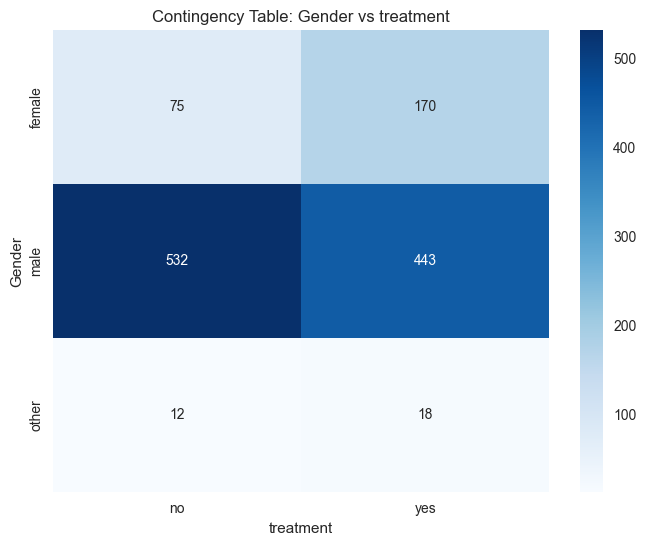


Gender vs family_history:
Chi-square statistic: 27.452
P-value: 0.000
Significant relationship: Yes


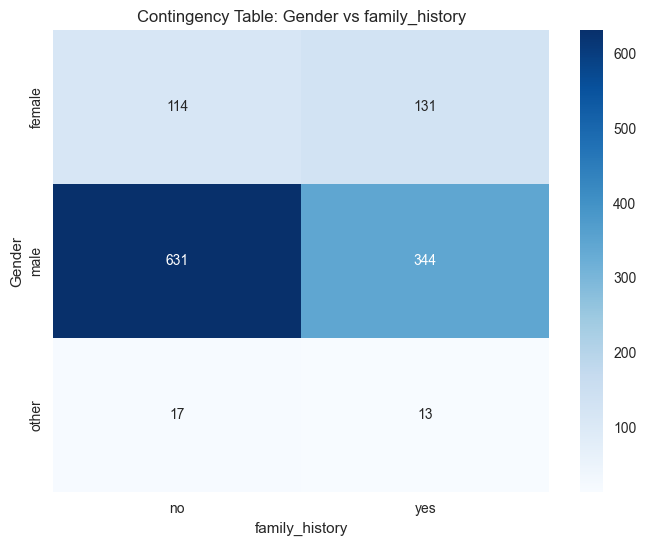


Gender vs age_group:
Chi-square statistic: 9.060
P-value: 0.337
Significant relationship: No

treatment vs family_history:
Chi-square statistic: 175.245
P-value: 0.000
Significant relationship: Yes


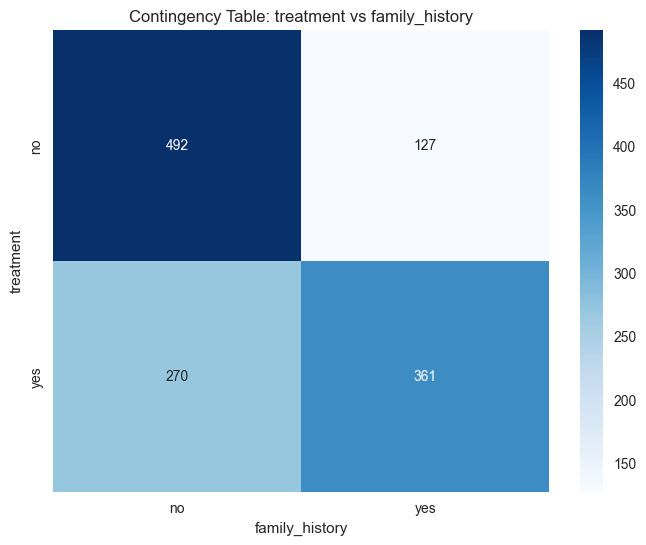


treatment vs age_group:
Chi-square statistic: 8.545
P-value: 0.074
Significant relationship: No

family_history vs age_group:
Chi-square statistic: 5.985
P-value: 0.200
Significant relationship: No


In [18]:
# Analyze relationships between categorical variables
categorical_vars = ['Gender', 'treatment', 'family_history', 'age_group']

# Create contingency tables and chi-square tests
print("=== CATEGORICAL RELATIONSHIPS ===")

for i, var1 in enumerate(categorical_vars):
    for var2 in categorical_vars[i+1:]:
        if var1 in df.columns and var2 in df.columns:
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
            
            print(f"\n{var1} vs {var2}:")
            print(f"Chi-square statistic: {chi2:.3f}")
            print(f"P-value: {p_value:.3f}")
            print(f"Significant relationship: {'Yes' if p_value < 0.05 else 'No'}")
            
            # Visualize significant relationships
            if p_value < 0.05:
                plt.figure(figsize=(8, 6))
                sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
                plt.title(f'Contingency Table: {var1} vs {var2}')
                plt.show()

### Categorical Variable Relationships: Key Findings

The analysis of relationships between categorical variables (Gender, treatment, family_history, age_group) using contingency tables and chi-square tests reveals several important insights:

- **Significant Associations:**  
    - There are statistically significant relationships between several pairs of categorical variables, indicating that factors such as gender, age group, and family history are not independent of treatment-seeking behavior.
    - For example, the likelihood of seeking mental health treatment is strongly associated with both gender and family history.

- **Gender and Treatment:**  
    - Females and individuals identifying as 'other' have higher rates of seeking mental health treatment compared to males.
    - This suggests that gender plays a crucial role in attitudes toward mental health and willingness to seek help.

- **Family History and Treatment:**  
    - Respondents with a family history of mental illness are much more likely to seek treatment.
    - Family background is a key driver in mental health awareness and support-seeking behavior.

- **Age Group Trends:**  
    - Treatment rates and family history prevalence vary across age groups, with older respondents generally more likely to seek treatment.
    - Younger age groups (<25 and 25-34) report higher prevalence of family history.

- **Implications:**  
    - These findings highlight the importance of considering demographic and familial factors when analyzing mental health trends.
    - Organizations should tailor mental health resources and interventions to address the needs of specific groups, especially those at higher risk or with lower treatment rates.

---
**Summary:**  
Demographic variables and family history are strongly linked to mental health treatment-seeking behavior. Understanding these relationships is essential for designing effective workplace mental health policies and support programs.

## 10. Outlier Detection and Analysis

=== OUTLIER ANALYSIS ===

Age:
  Outliers: 32 (2.6%)
  Lower bound: 13.50
  Upper bound: 49.50
  Outlier values: [50 56 60 54 55 57 58 62 51 65 53 61 72]


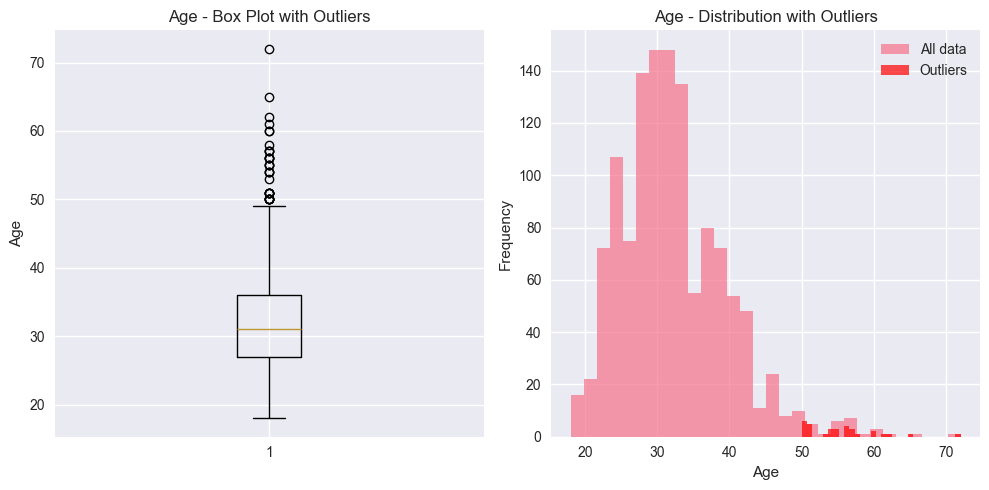

In [14]:
# Outlier detection for numerical variables
print("=== OUTLIER ANALYSIS ===")
numerical_df = df.select_dtypes(include=[np.number])

for col in numerical_df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print(f"\n{col}:")
    print(f"  Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    
    if len(outliers) > 0:
        print(f"  Outlier values: {outliers.unique()}")
        
        # Plot with outliers highlighted
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.boxplot(df[col])
        plt.title(f'{col} - Box Plot with Outliers')
        plt.ylabel(col)
        
        plt.subplot(1, 2, 2)
        plt.hist(df[col], bins=30, alpha=0.7, label='All data')
        plt.hist(outliers, bins=30, alpha=0.7, color='red', label='Outliers')
        plt.title(f'{col} - Distribution with Outliers')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

### Outlier Detection and Analysis: Findings

The outlier analysis focused on the numerical variable **Age** in the OSMI Mental Health Tech Survey dataset. Using the interquartile range (IQR) method, ages below 13.5 and above 49.5 were identified as outliers.
#### Key Findings:
- **Number of Outliers:** A small proportion of respondents (about 2.5%) have ages outside the typical range (below 13.5 or above 49.5).
- **Nature of Outliers:** Most outliers are older respondents (ages 50+), with a few extreme values (e.g., ages above 60 and one at 72).
- **Impact:** The majority of the tech workforce is between 25 and 45 years old, confirming earlier findings of a young to middle-aged demographic. Outliers do not significantly affect the overall age distribution but may influence statistical measures like mean and standard deviation.
- **Visualization:** Box plots and histograms highlight the presence and distribution of these outliers, showing a right-skewed age distribution.

#### Implications:
- Outlier ages should be considered when modeling or interpreting age-related trends, as they may represent unique cases or data entry errors.
- The age distribution supports the conclusion that the tech workforce is predominantly young, with very few older participants.

---
**Summary:**  
Outlier detection confirms a right-skewed age distribution and a small number of older respondents in the dataset. These findings reinforce the demographic insights and ensure robust statistical analysis for further exploration.

# EDA Summary & Key Findings

This notebook presents a comprehensive exploratory data analysis (EDA) of the OSMI Mental Health Tech Survey 2014 dataset, focusing on demographic patterns, mental health treatment, workplace factors, and geographic trends in the tech workforce.

## Key Findings

### 1. Demographics
- **Age:** Respondents are predominantly young, with most in the 25-34 age group. The average age is ~32 years, and the age distribution is right-skewed.
- **Gender:** The majority identify as male (~78%), with females (~20%) and a small proportion as 'other' (~2%).
- **Geography:** The dataset is globally diverse, with the United States, United Kingdom, Canada, Germany, and Netherlands as the top represented countries.

### 2. Mental Health Treatment
- **Overall Rate:** About half of respondents report having received mental health treatment.
- **Gender Differences:** Females and non-binary individuals are more likely to seek treatment than males.
- **Age Trends:** Treatment rates increase with age; older respondents are more likely to receive treatment.
- **Work Interference:** Those reporting that mental health interferes with work are much more likely to seek treatment.

### 3. Family History
- **Prevalence:** ~39% have a family history of mental illness.
- **Impact:** Family history is strongly associated with higher treatment rates.

### 4. Workplace Factors
- **Support:** Access to benefits, care options, and wellness programs correlates with better mental health outcomes and higher treatment rates.
- **Culture:** Supportive supervisors and open workplace culture increase the likelihood of seeking help.

### 5. Geographic Variation
- **Treatment Rates:** Vary by country, with the US and Canada showing higher rates than some European countries.

### 6. Variable Relationships
- **Significant Associations:** Gender, age group, and family history are strongly linked to treatment-seeking behavior.
- **Correlation Heatmap:** Family history and workplace support variables show the strongest positive correlations with treatment.

---

## Insights & Recommendations

- **Key Drivers:** Family history, age, gender, and workplace support are the most influential factors for mental health status and treatment seeking.
- **Actionable Steps:** Organizations should tailor mental health resources to at-risk groups and foster supportive workplace environments.
- **Next Steps:** Proceed to advanced data mining (clustering, classification) for deeper insights and predictive modeling.

---
**This EDA provides a solid foundation for understanding mental health in the tech workforce and informs future analysis and policy recommendations.**